# Spherical gradients application on sphere
This notebook consists the application of applyig an example sherical harmonic data to a sphere to obtain different lighting conditions.

In [1]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image=Image.open("/home/home/Desktop/SfsNet/NetworkModel/sphere.jpg")

In [6]:
Transforms=transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
imag=Transforms(image)
imag=imag.unsqueeze(0)

### Display function
The display function here displays the ouput of the applied spherical harmonics coefficients in gray format \
giving us the sphere in different lighting conditions.


In [86]:
def display(input):
    
    x=input
    x=x.unsqueeze(1)
    z=x[0]
    q=z.permute(1,2,0)
    q=q.numpy()
    if(np.all(q!=0)):
        plt.imshow(q,cmap="gray")
        plt.show()

In [93]:
def get_shading(N, L):
    C1 = 0.8862269254527579
    C2 = 1.0233267079464883
    C3 = 0.24770795610037571
    C4 = 0.8580855308097834
    C5 = 0.4290427654048917

    nx = N[:, 0, :, :]
    ny = N[:, 1, :, :]
    nz = N[:, 2, :, :]
    
    b, c, h, w = N.shape
    
    Y1 = C1 * torch.ones(b, h, w)
    Y2 = C2 * nz
    Y3 = C2 * nx
    Y4 = C2 * ny
    Y5 = C3 * (2 * nz * nz - nx * nx - ny * ny)
    Y6 = C4 * nx * nz
    Y7 = C4 * ny * nz
    Y8 = C5 * (nx * nx - ny * ny)
    Y9 = C4 * nx * ny

    L = L.type(torch.float)
    sh = torch.split(L, 9, dim=1)
    
    shading = torch.zeros(b, c, h, w)
    
    for j in range(c):
        l = sh[j]
        l = l.repeat(1, h*w).view(b, h, w, 9)
        l = l.permute([0, 3, 1, 2])
        display(Y3 * l[:, 2])
        display(Y4 * l[:, 3])
        display(Y5 * l[:, 4])
        display(Y6 * l[:, 5])
        display(Y7 * l[:, 6])
        display(Y8 * l[:, 7])
        display(Y9 * l[:, 8])
        shading[:, j, :, :] = Y1 * l[:, 0] + Y2 * l[:, 1] + Y3 * l[:, 2] + \
                            Y4 * l[:, 3] + Y5 * l[:, 4] + Y6 * l[:, 5] + \
                            Y7 * l[:, 6] + Y8 * l[:, 7] + Y9 * l[:, 8]
        

    return shading

***Note :*** The spherical harmonics data given below is an example data from the given synthetic dataset

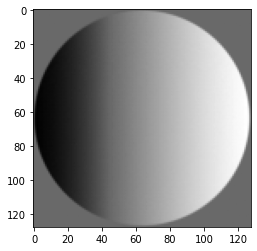

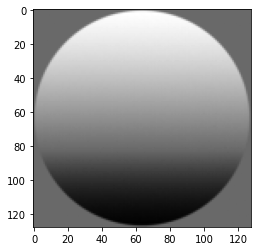

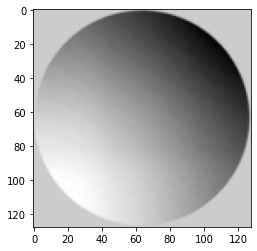

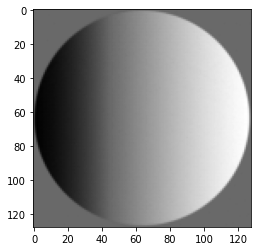

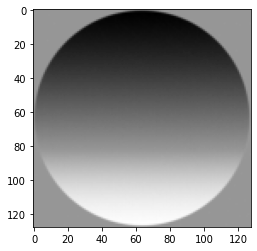

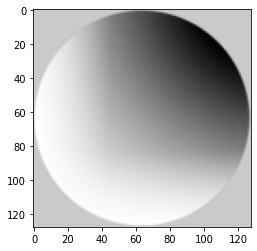

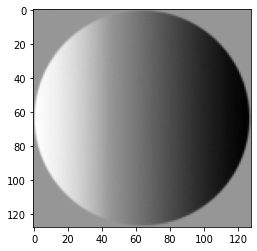

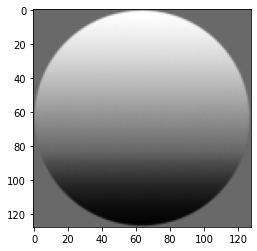

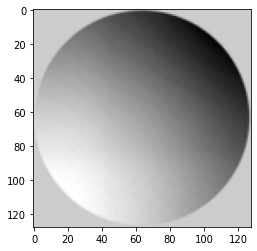

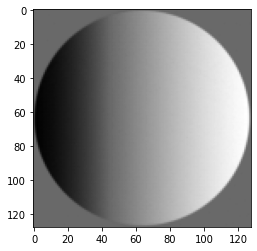

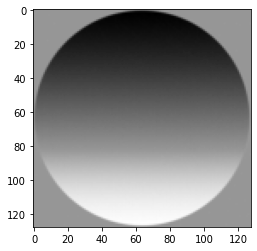

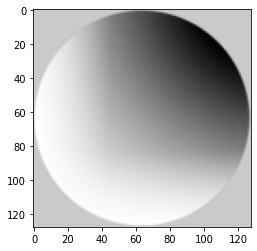

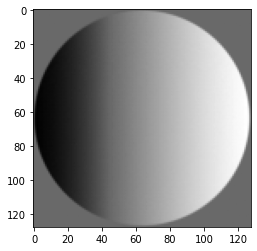

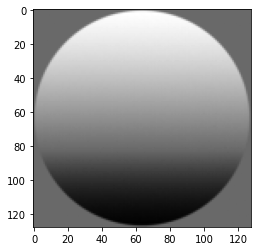

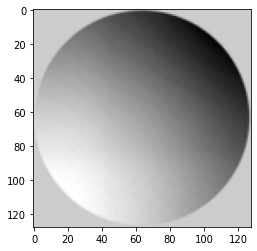

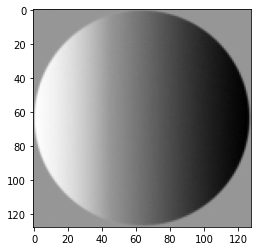

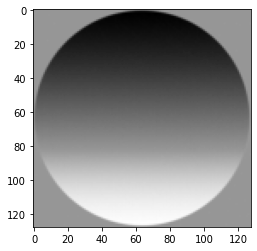

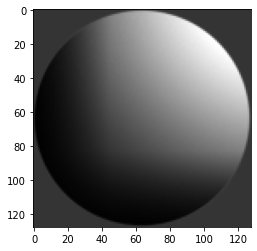

torch.Size([1, 3, 128, 128])

In [94]:
y =torch.Tensor([[1.00,  0.22,  0.19,  0.11,  0.11,  0.07,  -0.11, 0.00,  -0.05,
     0.12,  0.16,  -0.05, 0.06,  0.12,  0.05,  -0.10, 0.04,  -0.02,
     0.01,  0.10,  0.08,  0.15,  0.13,  -0.11, -0.07, -0.14, 0.06,
     -0.19, -0.02, 0.07,  -0.02, 0.07,  -0.01, -0.07, 0.04,  0.00]])
s=get_shading(imag,y)
s.shape